# January Data Cleaning

##### import libs


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### read the data

In [4]:
df = pd.read_csv("Disease and symptoms dataset.csv")
# df.head()

127 diseases out of 773 make up 50% of the data.
Diseases with the strongest (most specific) single-symptom links:
diseases
granuloma inguinale                      10.800000
heart contusion                          10.909091
toxoplasmosis                            11.000000
edward syndrome                          11.000000
diabetes insipidus                       11.000000
cushing syndrome                         11.333333
acute fatty liver of pregnancy (aflp)    11.333333
moyamoya disease                         11.500000
sporotrichosis                           12.000000
rocky mountain spotted fever             12.000000
Name: symptom_density, dtype: float64


/tmp/ipykernel_54284/3958790147.py:13: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  diversity = df.groupby('diseases').apply(lambda x: x.drop(columns='diseases').duplicated().sum())


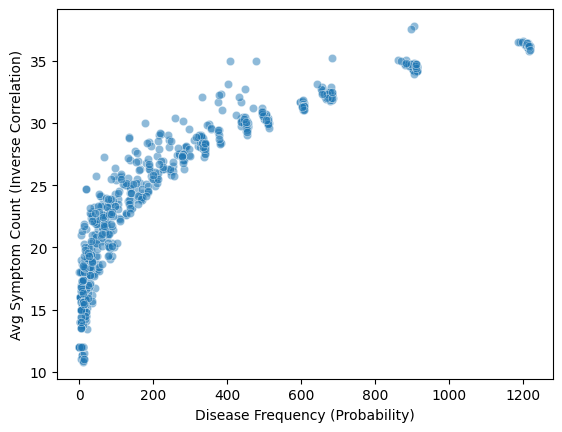

In [17]:
disease_counts = df['diseases'].value_counts(normalize=True).cumsum()
# How many diseases make up 50% of the dataset?
top_50_percent = (disease_counts <= 0.5).sum()
print(f"{top_50_percent} diseases out of 773 make up 50% of the data.")
# Create a column for how many symptoms are in each row
df['symptom_density'] = df.drop(columns=['diseases']).sum(axis=1)

# Group by disease to find which ones are "Strongly Linked" to single symptoms
link_strength = df.groupby('diseases')['symptom_density'].mean().sort_values()
print("Diseases with the strongest (most specific) single-symptom links:")
print(link_strength.head(10))
# Count unique symptom combinations per disease
diversity = df.groupby('diseases').apply(lambda x: x.drop(columns='diseases').duplicated().sum())
stats = df.groupby('diseases').agg({'symptom_density': 'mean', 'diseases': 'count'})
sns.scatterplot(data=stats, x='diseases', y='symptom_density', alpha=0.5)
plt.xlabel('Disease Frequency (Probability)')
plt.ylabel('Avg Symptom Count (Inverse Correlation)')
plt.show()